In [40]:
from sklearn.datasets import fetch_openml

# Load MNIST dataset from OpenML
mnist = fetch_openml('mnist_784', version=1)

# The dataset is now in the `mnist` object
X = mnist.data  # Features (28x28 pixel values)
y = mnist.target  # Labels (0-9 digits)

print(X.shape)  # (70000, 784), 70000 images, 28x28 pixels flattened
print(y.shape)  # (70000,), 70000 labels

(70000, 784)
(70000,)


In [41]:
import matplotlib.pyplot as plt

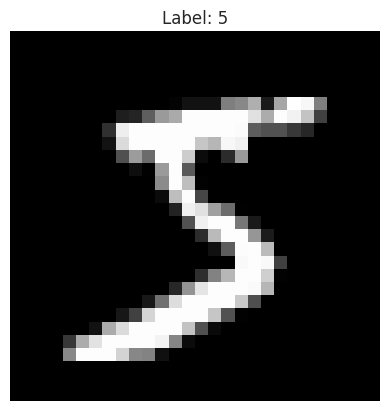

In [42]:
image_data = mnist.data.iloc[0].values  # First image as a 784-length array
image_data = image_data.reshape(28, 28)  # Reshape to 28x28 pixels

# Display the image
plt.imshow(image_data, cmap='gray')
plt.title(f"Label: {mnist.target.iloc[0]}")
plt.axis('off')  # Hide axes
plt.show()

This is the mnist dataset.It consists of hand written digits and thier labels.

Run the classification algorithmns such as LogisticRegression,KNeighborsClassifier, GaussianNB, SVM, Decision Trees, Random forest, KMeans and compare the accuracies of all the classifications models.

You have to import the model from sklearn

In [43]:
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
scaler = StandardScaler()

In [46]:
X_train = scaler.fit_transform(X_train)

In [47]:
X_test = scaler.transform(X_test)

In [48]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='lbfgs', n_jobs=-1),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Gaussian Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, n_jobs=-1),
    "KMeans (unsupervised)": KMeans(n_clusters=10, random_state=42, n_init=10)
}

In [49]:
# Train and evaluate models
results = {}
confusion_matrices = {}

In [50]:
for name, model in models.items():
    print(f"Training {name}...")
    start_time = time.time()

    if name == "KMeans (unsupervised)":
        model.fit(X_train)
        y_pred = model.predict(X_test)  # KMeans is unsupervised, so labels may not match exactly
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices[name] = cm

    accuracy = accuracy_score(y_test, y_pred)
    elapsed_time = time.time() - start_time
    results[name] = (accuracy, elapsed_time)
    print(f"{name}: Accuracy = {accuracy:.4f}, Time taken = {elapsed_time:.2f} sec")

Training Logistic Regression...
Logistic Regression: Accuracy = 0.9151, Time taken = 32.69 sec
Training K-Nearest Neighbors...
K-Nearest Neighbors: Accuracy = 0.9458, Time taken = 33.00 sec
Training Gaussian Naive Bayes...
Gaussian Naive Bayes: Accuracy = 0.5250, Time taken = 1.98 sec
Training Support Vector Machine...
Support Vector Machine: Accuracy = 0.9211, Time taken = 361.97 sec
Training Decision Tree...
Decision Tree: Accuracy = 0.8724, Time taken = 19.42 sec
Training Random Forest...
Random Forest: Accuracy = 0.9666, Time taken = 31.30 sec
Training KMeans (unsupervised)...
KMeans (unsupervised): Accuracy = 0.0000, Time taken = 168.59 sec


In [51]:
# Display results
print("\nModel Performance Comparison:")
for name, (accuracy, time_taken) in results.items():
    print(f"{name}: Accuracy = {accuracy:.4f}, Time = {time_taken:.2f} sec")


Model Performance Comparison:
Logistic Regression: Accuracy = 0.9151, Time = 32.69 sec
K-Nearest Neighbors: Accuracy = 0.9458, Time = 33.00 sec
Gaussian Naive Bayes: Accuracy = 0.5250, Time = 1.98 sec
Support Vector Machine: Accuracy = 0.9211, Time = 361.97 sec
Decision Tree: Accuracy = 0.8724, Time = 19.42 sec
Random Forest: Accuracy = 0.9666, Time = 31.30 sec
KMeans (unsupervised): Accuracy = 0.0000, Time = 168.59 sec


In [52]:
model_names = list(results.keys())
accuracies = [results[name][0] for name in model_names]
times = [results[name][1] for name in model_names]

In [53]:
sns.set_style("whitegrid")

<ipython-input-54-7bc5f413d9d9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=model_names, palette="viridis")


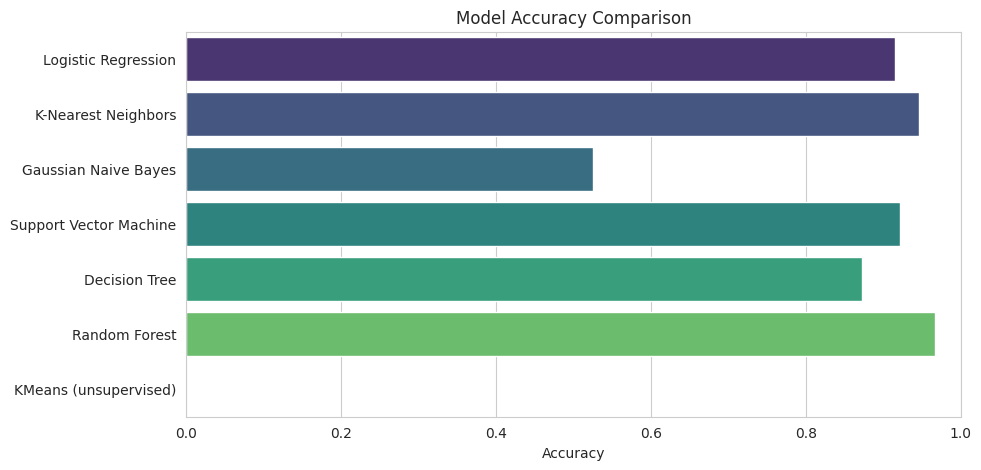

In [54]:
plt.figure(figsize=(10, 5))
sns.barplot(x=accuracies, y=model_names, palette="viridis")
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1)
plt.show()


<ipython-input-55-6ef4735a0823>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=times, y=model_names, palette="coolwarm")


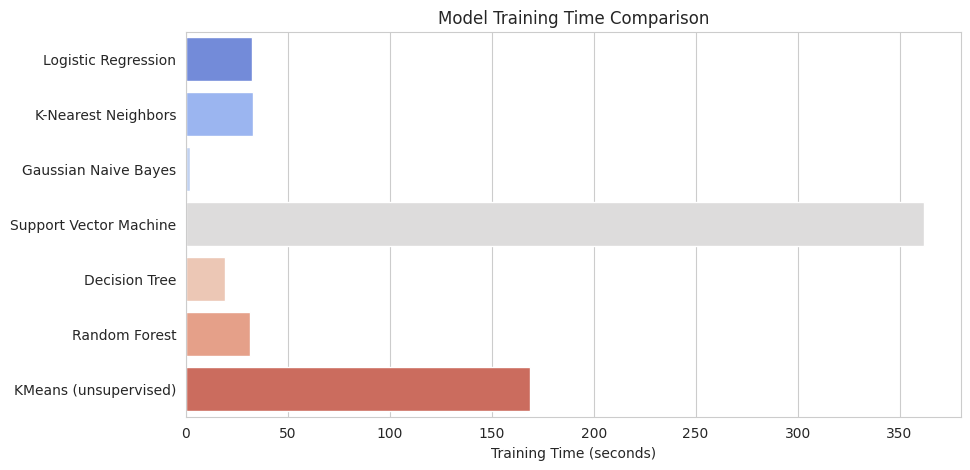

In [55]:
plt.figure(figsize=(10, 5))
sns.barplot(x=times, y=model_names, palette="coolwarm")
plt.xlabel("Training Time (seconds)")
plt.title("Model Training Time Comparison")
plt.show()

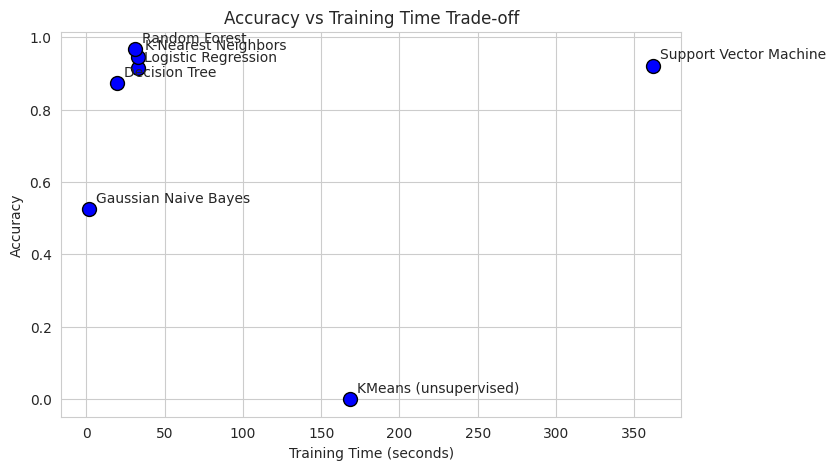

In [56]:
# Scatter plot: Accuracy vs Training Time
plt.figure(figsize=(8, 5))
plt.scatter(times, accuracies, color="blue", edgecolors="black", s=100)
for i, model in enumerate(model_names):
    plt.annotate(model, (times[i], accuracies[i]), fontsize=10, xytext=(5, 5), textcoords="offset points")

plt.xlabel("Training Time (seconds)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Training Time Trade-off")
plt.grid(True)
plt.show()

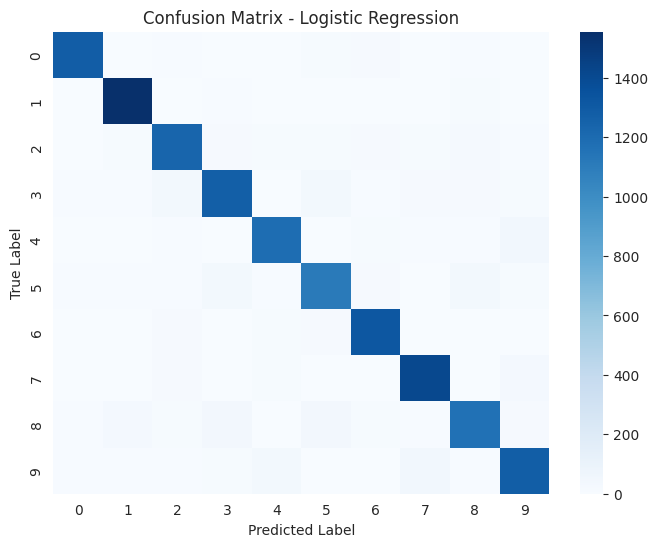

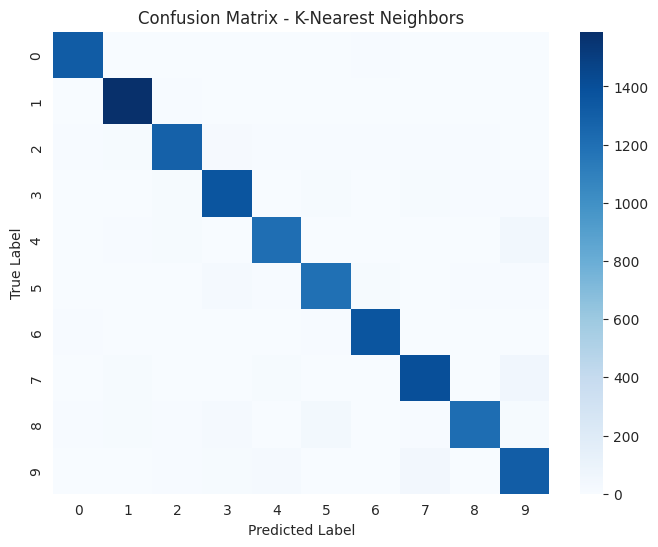

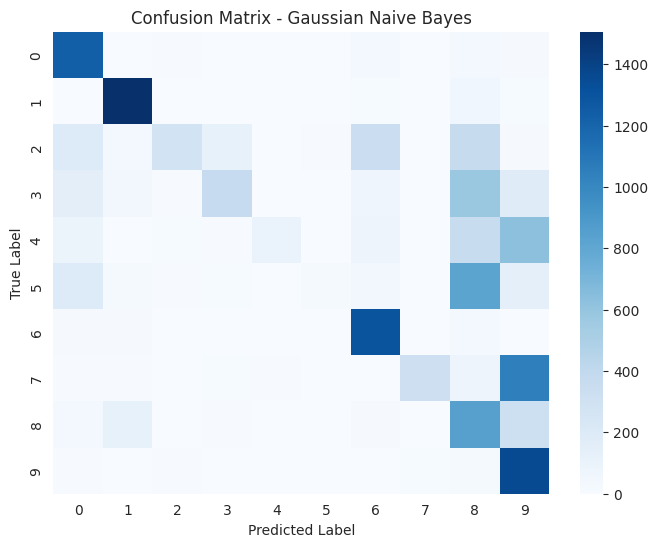

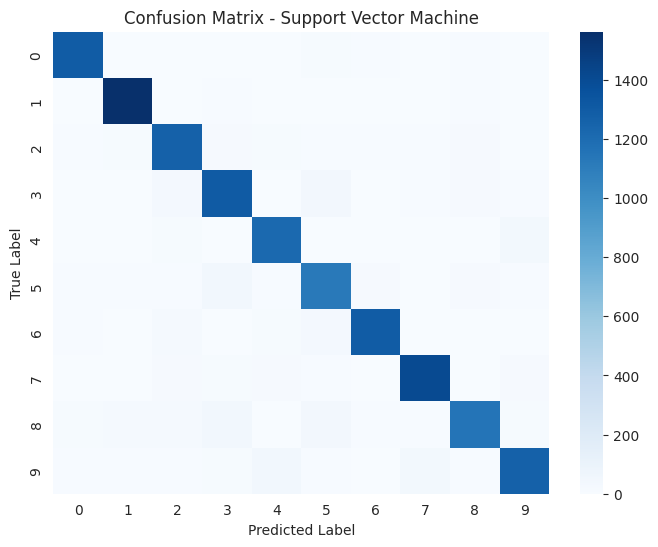

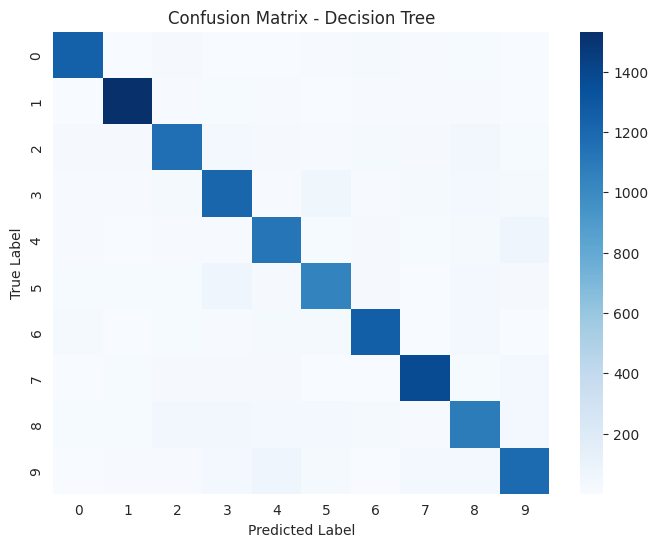

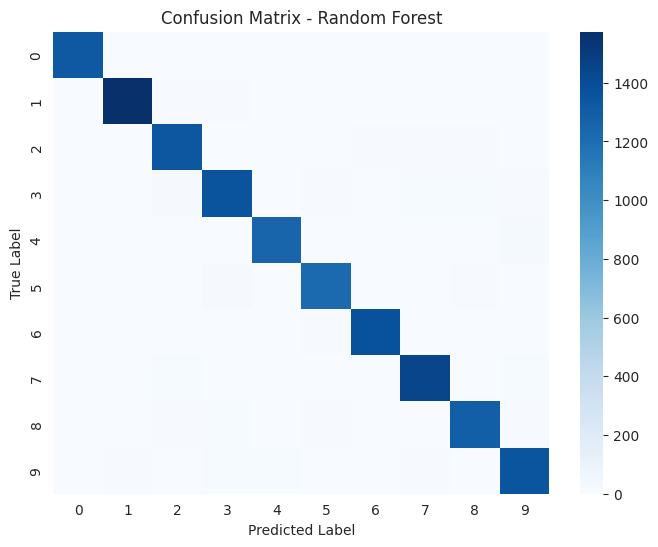

In [57]:
# Plot Confusion Matrices
for name,cm in confusion_matrices.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=False, cmap="Blues", fmt="d", xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

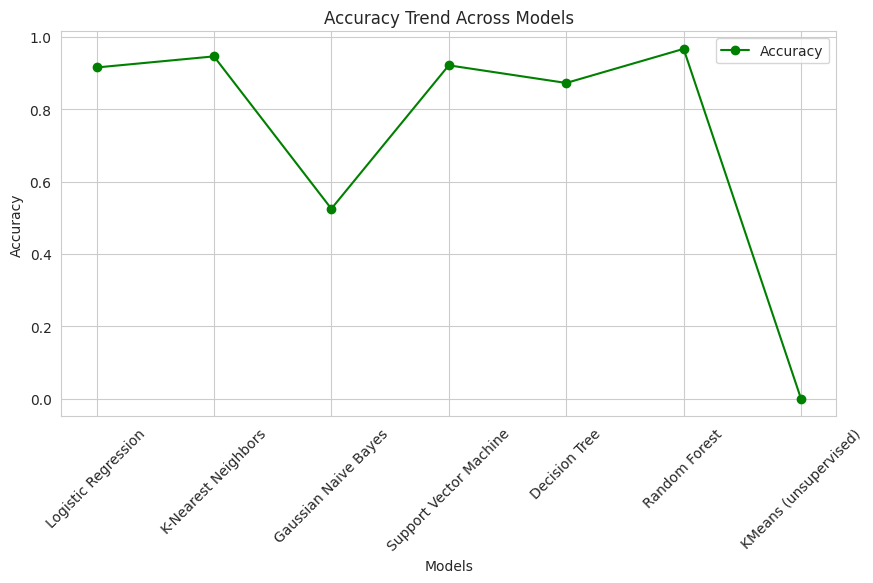

In [58]:
# Line Plot: Accuracy Trend Across Models
plt.figure(figsize=(10, 5))
plt.plot(model_names, accuracies, marker='o', linestyle='-', color="green", label="Accuracy")
plt.xticks(rotation=45)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Trend Across Models")
plt.legend()
plt.grid(True)
plt.show()